In [1]:
%matplotlib inline

In [2]:
from load_published_fits import load_bolshoi, load_mdpl

bpl_halos_fn = "/Users/aphearin/work/DATA/diffmah_data/PUBLISHED_DATA/bpl_diffmah_cens.npy"
bpl_fits_fn = "/Users/aphearin/work/DATA/diffmah_data/PUBLISHED_DATA/bpl_published_fits.h5"
mdpl_halos_fn = "/Users/aphearin/work/DATA/diffmah_data/PUBLISHED_DATA/mdpl2_diffmah_cens.npy"
mdpl_fits_fn = "/Users/aphearin/work/DATA/diffmah_data/PUBLISHED_DATA/mdpl_published_fits.h5"

bpl, t_b = load_bolshoi(bpl_fits_fn, bpl_halos_fn)
mdpl, t_m = load_bolshoi(mdpl_fits_fn, mdpl_halos_fn)


In [3]:
import os
OUTDIR = "/Users/aphearin/work/repositories/python/diffmah/diffmah/tests/testing_data"

### Define abscissa of target times

In [4]:
from diffmah.measure_mahs import get_clean_sample_mask, measure_target_data

t_min, t_max = 1.5, 13.7
t_target = np.linspace(t_min, t_max, 50)
lgt_target = np.log10(t_target)
np.save('nbody_target_data/nbody_t_target', t_target)
np.savetxt(os.path.join(OUTDIR, 'nbody_t_target.dat'), t_target)

Define a few constants for convenient plotting

In [5]:
nmax_to_scatter = 2_000

xlims = -0.7, 1.4
ylims = -3.4, 1.8


## $M_{\rm peak}=10^{11.5}M_{\odot}$

In [8]:
from astropy.table import Table
lgmp_sample = 11.5

halos, t = Table(bpl), t_b

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.02
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 7875
n_late = 13676


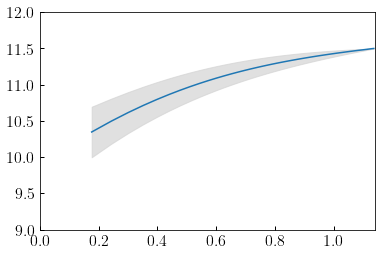

In [9]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(0, 1.14)
ylim = ax.set_ylim(9, lgmp_sample+0.5)

ylo, yhi = mean_log_mah-np.sqrt(var_log_mah), mean_log_mah+np.sqrt(var_log_mah)
__=ax.fill_between(lgt_target, ylo, yhi, color='lightgray', alpha=0.7)
__=ax.plot(lgt_target, mean_log_mah)

## $M_{\rm peak}=10^{11.75}M_{\odot}$

In [10]:
from astropy.table import Table
lgmp_sample = 11.75

halos, t = Table(bpl), t_b

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.02
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 4382
n_late = 9400
Percentage of halos passing the cut = 96.4%


## $M_{\rm peak}=10^{12}M_{\odot}$

In [13]:
from astropy.table import Table
lgmp_sample = 12.

halos, t = Table(bpl), t_b

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.05
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 5852
n_late = 14731
Percentage of halos passing the cut = 96.6%


## $M_{\rm peak}=10^{12.25}M_{\odot}$

In [14]:
from astropy.table import Table
lgmp_sample = 12.25

halos, t = Table(bpl), t_b

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.05
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 3010
n_late = 8989
Percentage of halos passing the cut = 96.9%


## $M_{\rm peak}=10^{12.5}M_{\odot}$

In [15]:
from astropy.table import Table
lgmp_sample = 12.5

halos, t = Table(bpl), t_b

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.1
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 3195
n_late = 11604
Percentage of halos passing the cut = 97.0%


## $M_{\rm peak}=10^{12.75}M_{\odot}$

In [16]:
from astropy.table import Table
lgmp_sample = 12.75

halos, t = Table(bpl), t_b

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.1
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 1594
n_late = 7180
Percentage of halos passing the cut = 97.2%


## $M_{\rm peak}=10^{13}M_{\odot}$

In [17]:
from astropy.table import Table
lgmp_sample = 13.0

halos, t = Table(bpl), t_b

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.15
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 1148
n_late = 6545
Percentage of halos passing the cut = 97.0%


## $M_{\rm peak}=10^{13.25}M_{\odot}$

In [18]:
from astropy.table import Table
lgmp_sample = 13.25

halos, t = Table(mdpl), t_m

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.05
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 1542
n_late = 12837
Percentage of halos passing the cut = 96.5%


## $M_{\rm peak}=10^{13.5}M_{\odot}$

In [19]:
from astropy.table import Table
lgmp_sample = 13.5

halos, t = Table(mdpl), t_m

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.05
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 1187
n_late = 12795
Percentage of halos passing the cut = 96.8%


## $M_{\rm peak}=10^{13.75}M_{\odot}$

In [20]:
from astropy.table import Table
lgmp_sample = 13.75

halos, t = Table(mdpl), t_m

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.05
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 804
n_late = 11619
Percentage of halos passing the cut = 97.1%


## $M_{\rm peak}=10^{14}M_{\odot}$

In [21]:
from astropy.table import Table
lgmp_sample = 14.0

halos, t = Table(mdpl), t_m

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.1
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 841
n_late = 17949
Percentage of halos passing the cut = 97.2%


## $M_{\rm peak}=10^{14.25}M_{\odot}$

In [22]:
from astropy.table import Table
lgmp_sample = 14.25

halos, t = Table(mdpl), t_m

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.1
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 334
n_late = 11303
Percentage of halos passing the cut = 97.2%


## $M_{\rm peak}=10^{14.5}M_{\odot}$

In [23]:
from astropy.table import Table
lgmp_sample = 14.5

halos, t = Table(mdpl), t_m

mmsk = np.abs(halos['logmp_fit']-lgmp_sample) < 0.1
lgtc_msk = halos['mah_logtc'] < 0
n_early = np.sum(mmsk&lgtc_msk)
n_late = np.sum(mmsk&~lgtc_msk)
print("n_early = {}".format(n_early))
print("n_late = {}".format(n_late))

it_min = np.argmin(np.abs(t-t_min))

sample = halos[mmsk]
indx = get_clean_sample_mask(sample['log_mah_fit'], lgmp_sample, it_min)
sample2 = sample[indx]

_targets = measure_target_data(
    10**sample['log_mah_fit'], sample['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_mah, mean_log_mah, var_log_mah, mean_dmhdt, var_dmhdt = _targets

_targets = measure_target_data(
    10**sample2['log_mah_fit'], sample2['dmhdt_fit'], np.log10(t), lgt_target, lgmp_sample)
mean_log_mah2, var_log_mah2 = _targets[1:3]

print("Percentage of halos passing the cut = {0:.1f}%".format(100*np.mean(indx)))

outpat = 'nbody_logmp_{0:.2f}'.format(lgmp_sample)
np.save('nbody_target_data/mean_log_mah_'+outpat, mean_log_mah)
np.save('nbody_target_data/var_log_mah_'+outpat, var_log_mah)
np.save('nbody_target_data/mean_dmhdt_'+outpat, mean_dmhdt)
np.save('nbody_target_data/var_dmhdt_'+outpat, var_dmhdt)

np.savetxt(os.path.join(OUTDIR, 'mean_log_mah_'+outpat+'.dat'), mean_log_mah)
np.savetxt(os.path.join(OUTDIR, 'var_log_mah_'+outpat+'.dat'), var_log_mah)
np.savetxt(os.path.join(OUTDIR, 'mean_dmhdt_'+outpat+'.dat'), mean_dmhdt)
np.savetxt(os.path.join(OUTDIR, 'var_dmhdt_'+outpat+'.dat'), var_dmhdt)

n_early = 83
n_late = 5958
Percentage of halos passing the cut = 97.8%


In [25]:
pat_list = list(('11.50', '11.75', '12.00', '12.25', '12.50', '12.75', '13.00',
                '13.25', '13.50', '13.75', '14.00', '14.25', '14.50'))
t_target = np.load("nbody_target_data/nbody_t_target.npy")
lgt_target = np.log10(t_target)
mean_log_mah_targets = np.array(
    [np.load('nbody_target_data/mean_log_mah_nbody_logmp_{}.npy'.format(lgmpat)) for lgmpat in pat_list])
var_log_mah_targets = np.array(
    [np.load('nbody_target_data/var_log_mah_nbody_logmp_{}.npy'.format(lgmpat)) for lgmpat in pat_list])

mean_dmhdt_targets = np.array(
    [np.load('nbody_target_data/mean_dmhdt_nbody_logmp_{}.npy'.format(lgmpat)) for lgmpat in pat_list])
var_dmhdt_targets = np.array(
    [np.load('nbody_target_data/var_dmhdt_nbody_logmp_{}.npy'.format(lgmpat)) for lgmpat in pat_list])

lgmp_targets = np.array([float(lgm) for lgm in pat_list])


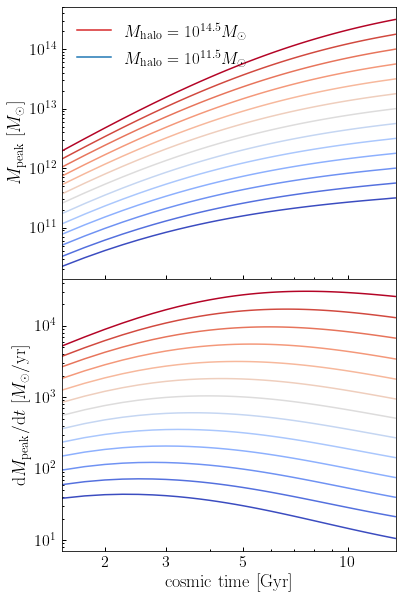

In [28]:
import matplotlib.cm as cm
from matplotlib import ticker
from matplotlib import lines as mlines

colormap_seq=np.linspace(0, 1, lgmp_targets.size)
colors=cm.coolwarm(colormap_seq)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 10), sharex=True)
fig.subplots_adjust(hspace=0)

xlim = ax0.set_xlim(1.5, 13.8)

__=ax0.loglog()
__=ax1.loglog()
for i in range(len(lgmp_targets)):
    __=ax0.plot(t_target, 10**mean_log_mah_targets[i, :], c=colors[i])
    __=ax1.plot(t_target, mean_dmhdt_targets[i, :], c=colors[i])

_xticks=ax0.set_xticks((2, 3, 5, 10))
__=ax0.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax0.get_xaxis().set_minor_formatter(ticker.NullFormatter())
xlabel = ax1.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax0.set_ylabel(r'$M_{\rm peak}\ [M_{\odot}]$')
ylabel = ax1.set_ylabel(r'${\rm d}M_{\rm peak}/{\rm d}t\ [M_{\odot}/{\rm yr}]$')

red_line=mlines.Line2D([],[],ls='-',c=mred,label=r'$M_{\rm halo}=10^{14.5}M_{\odot}$')
blue_line=mlines.Line2D([],[],ls='-',c=mblue,label=r'$M_{\rm halo}=10^{11.5}M_{\odot}$')
first_legend=ax0.legend(handles=[red_line, blue_line], fontsize=17)

fig.savefig('nbody_target_data/average_assembly_target_data.png', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)